In [2]:
#@title Setup
import os, subprocess

# def setup():
#     install_cmds = [
#         ['pip', 'install', 'gradio'],
#         ['pip', 'install', 'open_clip_torch'],
#         ['pip', 'install', 'clip-interrogator'],
#     ]
#     for cmd in install_cmds:
#         print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

# setup()


caption_model_name = 'blip-large' #@param ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}

    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)


Loading caption model blip-large...


Loading CLIP model ViT-L-14/openai...


100%|███████████████████████████████████████| 933M/933M [00:17<00:00, 54.4MiB/s]
ViT-L-14_openai_artists.safetensors: 100%|██████████████████████████████████████████████████████████████████████████| 16.2M/16.2M [00:00<00:00, 78.0MB/s]
ViT-L-14_openai_flavors.safetensors: 100%|████████████████████████████████████████████████████████████████████████████| 155M/155M [00:08<00:00, 19.2MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|█████████████████████████████████████████████████████████████████████████████| 146k/146k [00:00<00:00, 412kB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████████████████████████████████████████████████████████████████████| 307k/307k [00:00<00:00, 18.4MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|███████████████████████████████████████████████████████████████████████████| 111k/111k [00:00<00:00, 324kB/s]
ViT-L-14_openai_negative.safetensors: 100%|██████████████████████████████████████████████████████████████████████████| 63.2k/63.2k [00:00<00:00, 184k

Loaded CLIP model and data in 35.80 seconds.


a cartoon character of a girl with blonde hair and a pink dress, conceptual mystery pokemon, bowl haircut, noot noot, big round nose closed lips, slutcore, epic 3 d oshun, trout in pants, long straight bangs, face like monkey, maggots, behold, deph of field, r/aww


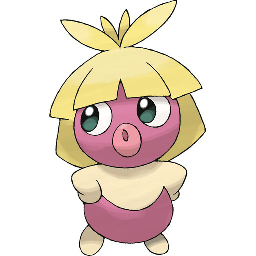

Generating prompts:  97%|████████████████████████████████████████████████████████████████████████████████████████▊   | 801/830 [3:34:27<07:26, 15.39s/it]

a group of eggs with faces and eyes are sitting on a table, bulbapedia, river of wine, arrogant and sinister attitude, chilean, pink angry bubble, mining, pc, group intelligence, white head, toxicity, lookalike, grapes, desenho, balding, musculous, young


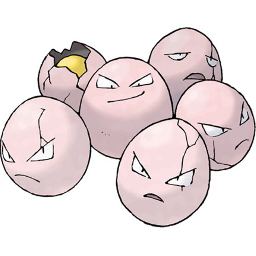

Generating prompts:  97%|████████████████████████████████████████████████████████████████████████████████████████▉   | 802/830 [3:34:44<07:27, 15.99s/it]

a black and white wolf with red eyes standing in front of a white background, pokemon art style, hairy legs, black wavy hair with bangs, the uncanny valley, black stripes, inspired by Derek Chittock, 1/4 profile, aliased, genshin, banshee, labrador, pre-rendered, shiny


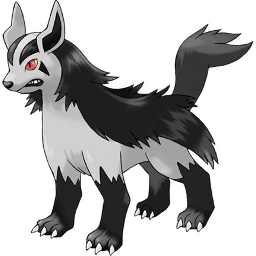

Generating prompts:  97%|█████████████████████████████████████████████████████████████████████████████████████████   | 803/830 [3:34:59<07:01, 15.62s/it]

a red and green pokemon character with a black tail, pelzebug, gelbooru anime image, pink, chonker cat, by Avgust Černigoj, tarantulas, anti aliased, he is sad, aquarion, mold, sturdy, robust, stable diffusion ai, bolsonaro, roll 2 0, karl marx


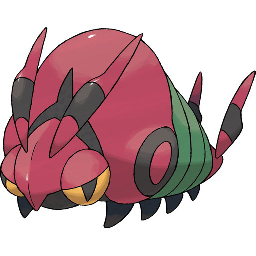

Generating prompts:  97%|█████████████████████████████████████████████████████████████████████████████████████████   | 804/830 [3:35:18<07:15, 16.75s/it]

a close up of a sheep with a ball in its mouth, the fox-like evolution pokemon, soft image shading, blue soft background, dreaming of electric sheep, cosplay, youthful, curly bangs, muslim, 2 years old, white and gold, dust cloud, dd, videogame asset, 1 8 2 4, new pokemon


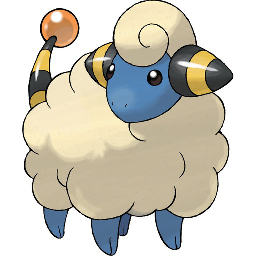

Generating prompts:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 805/830 [3:35:35<06:58, 16.76s/it]

a close up of a pokemon with a red and yellow hat, white spiral horns, sharp spiky rocks, moat, 4 0 9 6, calf, greta thunberg smiling, insectile forearms folded, sleek spines, battleaxe, landcape, inflatable, twink, full profile, mud, weenie, scorn


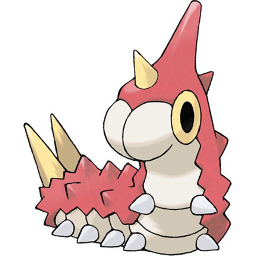

Generating prompts:  97%|█████████████████████████████████████████████████████████████████████████████████████████▎  | 806/830 [3:35:53<06:48, 17.00s/it]

a cartoon image of a pink pokemon character with a bat, sharp claws close up, crab, purple cloth, inspired by Leon Kapliński, high resolution image, gargoyle, similar to pokemon, mayo, water type, mines, 3 4 5 3 1, lobster, jcb, mutated, aoc, derpy


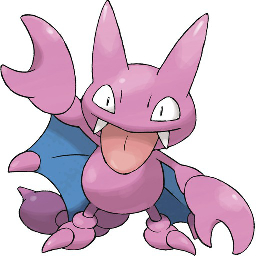

Generating prompts:  97%|█████████████████████████████████████████████████████████████████████████████████████████▍  | 807/830 [3:36:13<06:50, 17.87s/it]

a close up of a cartoon character with a sword and a red suit, giant insects, in pokemon comic, absurdly muscular physique, no watermark signature, mars black, by Grillo Demo, pokeball, official product image, by Aquirax Uno, showing strong muscles, moths, wrestler, 1 1 1 1, buggy, magitech


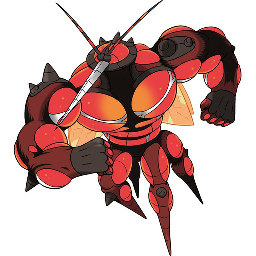

Generating prompts:  97%|█████████████████████████████████████████████████████████████████████████████████████████▌  | 808/830 [3:36:30<06:27, 17.59s/it]

a cartoon cat with big eyes and a pink nose, ghost sphere, micropohone, exploitable image, ruffles, starburst, official render, seven pointed pink star, bruh moment, dust cloud, ranker, listing image, aliased, shield, bingus, adorable design, holding a ball


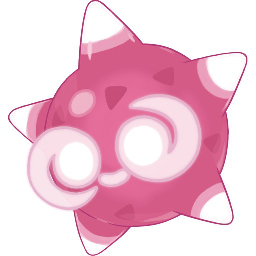

Generating prompts:  97%|█████████████████████████████████████████████████████████████████████████████████████████▋  | 809/830 [3:36:47<06:06, 17.47s/it]

a cartoon image of a purple and green pokemon character, cranberry helmet, twink, fig.1, single head, vineyard, bilquis evely, conceptual mystery pokemon, vulgar, pouches, realistic lance, binkley, bum, thanshuhai, torrent


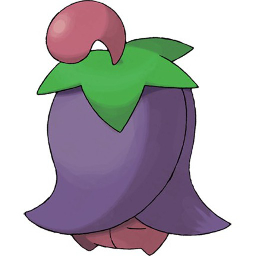

Generating prompts:  98%|█████████████████████████████████████████████████████████████████████████████████████████▊  | 810/830 [3:37:02<05:35, 16.75s/it]

a close up of a blue and white pokemon character, cockroach character, alexandria ocasio - cortez, black mist, aliased, hands up, water bear, recolored, highly upvoted, aquarion, treant, foto, by Bourgeois, with a long, of


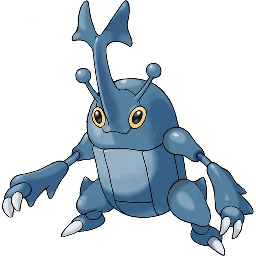

Generating prompts:  98%|█████████████████████████████████████████████████████████████████████████████████████████▉  | 811/830 [3:37:17<05:09, 16.30s/it]

a yellow pokemon character with a large tail and a large nose, spoon placed, battle pose, ork, cutlery, uncompressed png, shaquille o'neil pregnant, reptilian, plating, stylized, metal speculars, savory, anorexic figure, bowl, image, xqc, jpeg artifact, 1 2 0 0 dpi


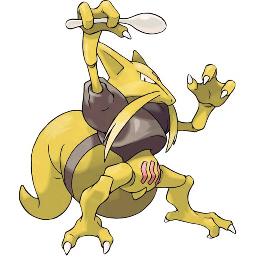

Generating prompts:  98%|██████████████████████████████████████████████████████████████████████████████████████████  | 812/830 [3:37:36<05:04, 16.93s/it]

a close up of a pokemon tree with a lot of leaves, bladee from drain gang, his arms spread. ready to fly, spades slick, danhausen, beautiful elegant dryad, this character has cryokinesis, inspired by Nyuju Stumpy Brown, buggy, enormous hands, wood, 4 0 9 6, bigfoot


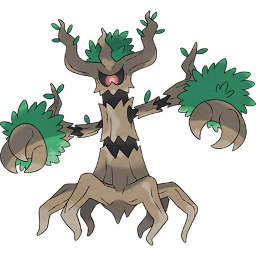

Generating prompts:  98%|██████████████████████████████████████████████████████████████████████████████████████████  | 813/830 [3:37:49<04:31, 16.00s/it]

a red and white pokemon type dragon with a large mouth, greta thunberg, thick brown beard, absolute chad, sittin, long spikes, tyrannosarus rex, crowned, good edge control, <pointé pose>;open mouth, frill, this is a monster, large shoulders, an elderly, meteor


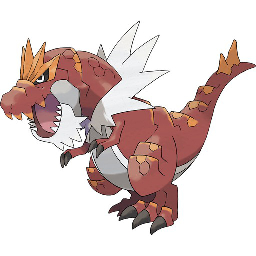

Generating prompts:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 814/830 [3:38:06<04:18, 16.17s/it]

a close up of a cartoon character wearing a hat and a dragon costume, platypus, iron crown, 2019, cynthwave, fame of thrones, conceptual mystery pokemon, name of the character is chad, dreamcast, red, pagan


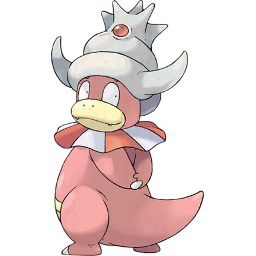

Generating prompts:  98%|██████████████████████████████████████████████████████████████████████████████████████████▎ | 815/830 [3:38:17<03:40, 14.72s/it]

a cartoon bee with two bees on its back, bulbapedia, smiling confidently, hexagonal stones, 2019, face of an human, aliased, 4237549348, three head one body, breeding, bixbite, iron, pokimane, pink bees, aww, pronounced contours, solar


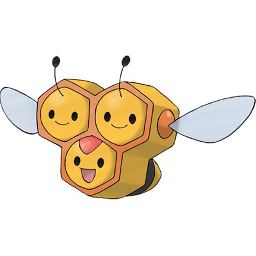

Generating prompts:  98%|██████████████████████████████████████████████████████████████████████████████████████████▍ | 816/830 [3:38:35<03:38, 15.58s/it]

a cartoon image of a very cute looking pokemon with big eyes, large gaping mouth, metal ears purple eyes, 2019, ogre, symatrical, profile image, mammoth, wheels, shaq


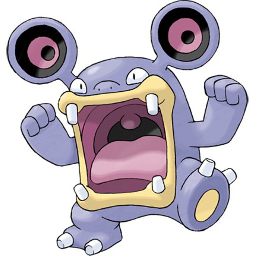

Generating prompts:  98%|██████████████████████████████████████████████████████████████████████████████████████████▌ | 817/830 [3:38:45<03:02, 14.02s/it]

a cartoon image of a pokemon character with a big smile, full body dramatic profile, brute, cone, left trad, cobblestone, fighting stance energy, nigredo, very round, kerlee, by An Gyeon, single horn, iconic icon, raising an arm, chunky, lorde


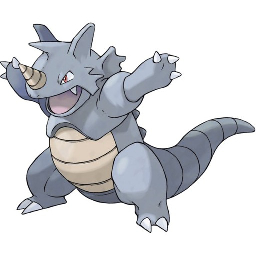

Generating prompts:  99%|██████████████████████████████████████████████████████████████████████████████████████████▋ | 818/830 [3:39:02<02:56, 14.69s/it]

a close up of a cartoon bird with a red collar and a black and white beak, illustration pokemon, game icon asset, nigredo, similar aesthetics to picasso, witch academia, with high cheekbones, black red white clothes, long boi, by Mondrian, immature, queer


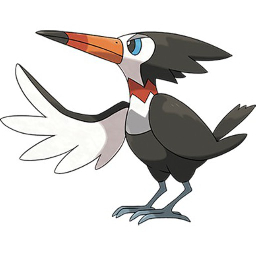

Generating prompts:  99%|██████████████████████████████████████████████████████████████████████████████████████████▊ | 819/830 [3:39:14<02:34, 14.07s/it]

a small brown and white dog with a black collar, portrait of zeraora, spiky elf ears, 2 0 1 9 anime, antialiased, with a halo of unkempt hair, the lorax, fur texture, forward facing pose, ( dog ) looks like elephant, pitchfork, kitty, face profile, root trap, sheet, sap


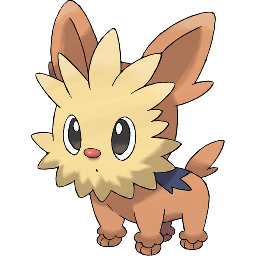

Generating prompts:  99%|██████████████████████████████████████████████████████████████████████████████████████████▉ | 820/830 [3:39:31<02:29, 14.92s/it]

a cartoon lizard with a red tail and a black body, by Ken Sugimori, aliased, discord pfp, long black crown, aquiline nose, 2019, often described as flame-like, smol, chupacabra, moat, mullet, nick land, child of dark, evil pose, eats bambus


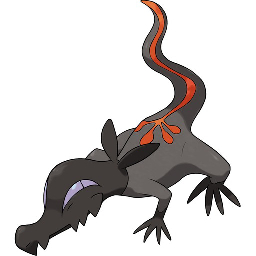

Generating prompts:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 821/830 [3:39:48<02:18, 15.39s/it]

a close up of a cartoon turtle with a cloud in the background, exhaust smoke, illustration pokemon, mold, smoke fills the room, realistic lance, tankoban, meme template, poop, dark sepia toned shading, official splash art, rude, exoskeletton, smelly, red, pacing, bong, imagenet


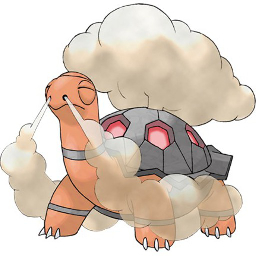

Generating prompts:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 822/830 [3:40:06<02:10, 16.36s/it]

a cartoon character of a blue and white cat with a blue tail, melting into lilligant, 2 d full body lion, absolute chad, the hair floats on the water, face like monkey, shiny plastic, rasterized, gollum, citrinitas, leaked, ringlet, by Yasutomo Oka, druid


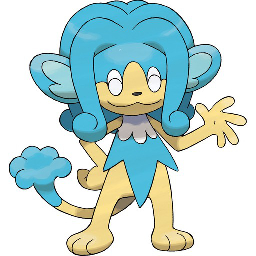

Generating prompts:  99%|███████████████████████████████████████████████████████████████████████████████████████████▏| 823/830 [3:40:21<01:50, 15.84s/it]

a cartoon picture of a purple and green monster with green eyes, octorok, softly swirling magical energy, mimikyu, everything enclosed in a circle, ghost of the fire spirit, ultra detailed content : face, the stone is round, swirl, withered, chozo, his back is turned


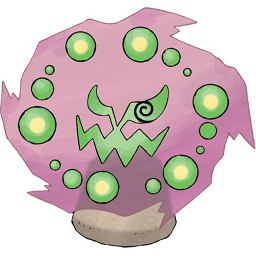

Generating prompts:  99%|███████████████████████████████████████████████████████████████████████████████████████████▎| 824/830 [3:40:33<01:29, 14.88s/it]

a cartoon fish with a pink tail and a blue eye, by Ken Sugimori, smokey eye, 2 0 1 9 anime, madonna, face accuracy, 1450, soft blush, full body dramatic profile, with a bob cut, gertrude, beach aesthetic, thick fancy eyeliner, soggy, red blush


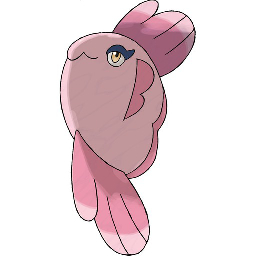

Generating prompts:  99%|███████████████████████████████████████████████████████████████████████████████████████████▍| 825/830 [3:40:49<01:15, 15.08s/it]

a close up of a pink pokemon character with a white shirt, nigel thornberry, hippo face morphed, blimp, [ metal ], inspired by Wlodzimierz Tetmajer, tail raised, mawshot, chimneys, reddit, shaquille o'neil pregnant, image, mammoth, ilithid, 27, soup


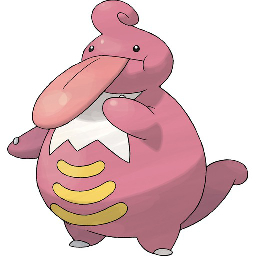

Generating prompts: 100%|███████████████████████████████████████████████████████████████████████████████████████████▌| 826/830 [3:41:06<01:02, 15.53s/it]

a close up of a cartoon character with a very large head, melting into vulpix, black mold, the flower crown, ( golden hour ), fatigue, wearing a blue berries, scobillyflup, floggers, oozing pustules, mono, tired, wall, crono, full protrait, wind - swept, watedrops, ds


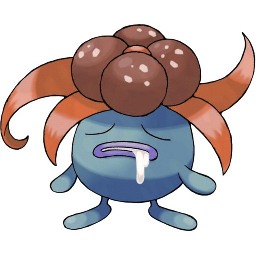

Generating prompts: 100%|███████████████████████████████████████████████████████████████████████████████████████████▋| 827/830 [3:41:24<00:49, 16.49s/it]

a very cute pokemon with a big tail and big ears, ultrarealistic sweet bunny girl, looks like jerma985, sexy girl with dark complexion, long afro hair, inspired by Lili Árkayné Sztehló, very soft shadowing, the anime girl is crouching, eevee, powerful radiant confident vibe, the, sza, thot


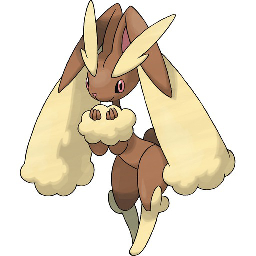

Generating prompts: 100%|███████████████████████████████████████████████████████████████████████████████████████████▊| 828/830 [3:41:40<00:32, 16.24s/it]

a blue and white crab with large claws and a red eye, golem, illustration pokemon, renault, looks directly at camera, dd, large metal jaw, frozen cold stare, aliased, rondel, long boi, rock roof, autodesk, lazy eye, behold, the, adrian, dark metal, ese


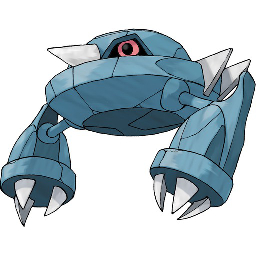

Generating prompts: 100%|███████████████████████████████████████████████████████████████████████████████████████████▉| 829/830 [3:41:59<00:17, 17.19s/it]

a close up of a cartoon character holding a key, conceptual mystery pokemon, chrome face symmetry, natural prison light, black metal aesthetics, genius design, kidney, white limbo, hindu aesthetic, long boi, open vault, chains, mold, daddy energy, robust, ign, lock


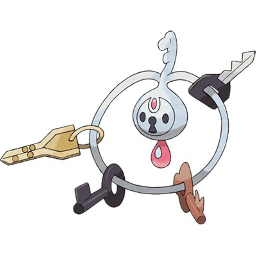

Generating prompts: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 830/830 [3:42:17<00:00, 16.07s/it]





Generated 830 prompts and saved to /project/smcho1201/WEBAI/data/trainB/desc.csv, enjoy!


In [8]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/project/smcho1201/WEBAI/data/trainB" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast","classic","negative"]
output_mode = 'desc.csv' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")
